In [ ]:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# colab built-in packages

In [ ]:
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.12.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
astor                         0.8.1         
astropy                       4.2.1         
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         20.3.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.0         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis                          0.4.1         
bokeh     

# Kaggle setup

In [ ]:
# Colab library to upload files to notebook
from google.colab import files
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Kaggle/tps_mar')
!ls

#root_path = '/content/gdrive/My Drive/Kaggle/tps_mar'

Mounted at /content/gdrive
kaggle.json  TPS_Mar_2021.ipynb  tps_mar_files


In [ ]:
# Upload kaggle API key file
# uploaded = files.upload()
# !ls

In [ ]:
# # moving json to kaggle directory
# !pip install -q kaggle
# !kaggle --version
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle
# !pwd

In [ ]:
# !kaggle competitions download -c tabular-playground-series-mar-2021 -p tps_mar_files
# !pwd
# !ls

# Import Data

In [ ]:
os.chdir('/content/gdrive/My Drive/Kaggle/tps_mar')
os.chdir('tps_mar_files')
!pwd

/content/gdrive/My Drive/Kaggle/tps_mar/tps_mar_files


In [ ]:


# !unzip -q train.csv.zip
# !unzip -q test.csv.zip
# !unzip -q sample_submission.csv.zip


In [ ]:
df_train = pd.read_csv('train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_test = pd.read_csv('test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df_sample_sub = pd.read_csv('sample_submission.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

print("Training data: {0} rows and {1} features".format(df_train.shape[0], df_train.shape[1]))
print("Test data: {0} rows and {1} features".format(df_test.shape[0], df_test.shape[1]))

# Feature Definition

In [ ]:
cont_features = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']
cat_features = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
target = df_train['target']

# Initial Data Review
- Describe (continuous features)
- Info
- Unique values (categorical features)
- NaNs and Duplicates


In [ ]:
display(df_train.describe().T)
print(df_train.info())

,count,mean,std,min,25%,50%,75%,max
id,300000.0,250183.425697,144320.334812,0.000000,125399.750000,250192.500000,375246.250000,499999.000000
cont0,300000.0,0.504749,0.206788,-0.049562,0.344985,0.479650,0.637657,1.004559
cont1,300000.0,0.494073,0.213037,0.084480,0.317363,0.463170,0.693992,1.009958
cont2,300000.0,0.516632,0.214851,0.094493,0.326047,0.471247,0.704625,1.016600
cont3,300000.0,0.474235,0.216636,-0.045316,0.292249,0.387564,0.644950,0.952187
cont4,300000.0,0.504848,0.227474,0.168071,0.279303,0.479858,0.725779,0.858578
cont5,300000.0,0.502257,0.241243,-0.036379,0.276442,0.554768,0.735225,0.853022
cont6,300000.0,0.488229,0.211335,0.005199,0.323914,0.518089,0.608537,0.966553
cont7,300000.0,0.501739,0.203496,0.090901,0.353054,0.435404,0.642023,1.035818
cont8,300000.0,0.488074,0.179048,0.024139,0.358915,0.410908,0.612725,1.055885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [ ]:
print(f"unique values for each categorical column: {df_train[cat_features].nunique()}")
print(f"\nnans: {df_train.isna().sum()}")
print(f"\nduplicated: {df_train.duplicated().sum()}")


unique values for each categorical column: cat0       2
cat1      15
cat2      19
cat3      13
cat4      20
cat5      84
cat6      16
cat7      51
cat8      61
cat9      19
cat10    299
cat11      2
cat12      2
cat13      2
cat14      2
cat15      4
cat16      4
cat17      4
cat18      4
dtype: int64

nans: id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

duplicated: 0


# Dataset Description
Continuous features: 10. float64
  
Categorical Features: 19, all strings
  
Target: 0 or 1
  
No NaNs or duplicates

# EDA

- Plotting distributions
  - target
  - Continuous: With target and intra
  - Categorical: With target and intra


- Mutual information score from sklearn.feature_selection
  - mutual_info_regression
  - mutual_info_classif

## Target

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(target)

<function matplotlib.pyplot.show>

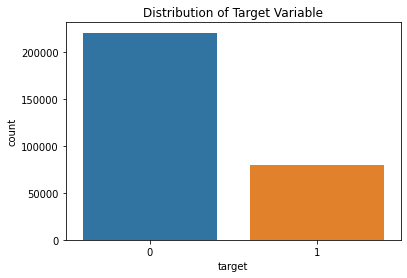

In [ ]:
plt.figure()
sns.countplot(x=target)
plt.title('Distribution of Target Variable')
plt.show

## Continuous Feature Analysis

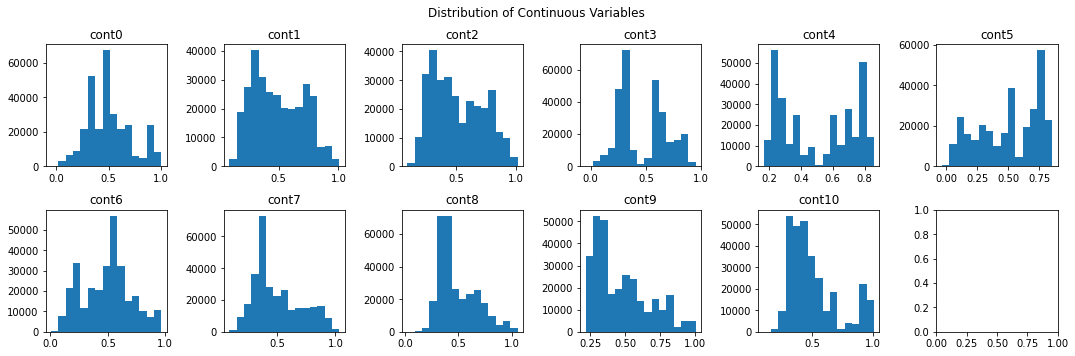

In [ ]:
plt.subplots(2,6, figsize=(15,5))
plt.suptitle('Distribution of Continuous Variables')

for i, col in enumerate(df_train[cont_features].columns, 1):
  plt.subplot(2,6,i)
  plt.hist(df_train[col], bins=15)
  plt.title(col)
plt.tight_layout(rect=[0, 0, 1, .95])
plt.show()


In [ ]:
# PAIRPLOTTING CONT VARIABLES FOR COLLINEARITY
# Find a way to plot just the overlapping distributions


#sns.pairplot(df_train[cont_features+['target']], corner=True, hue='target')

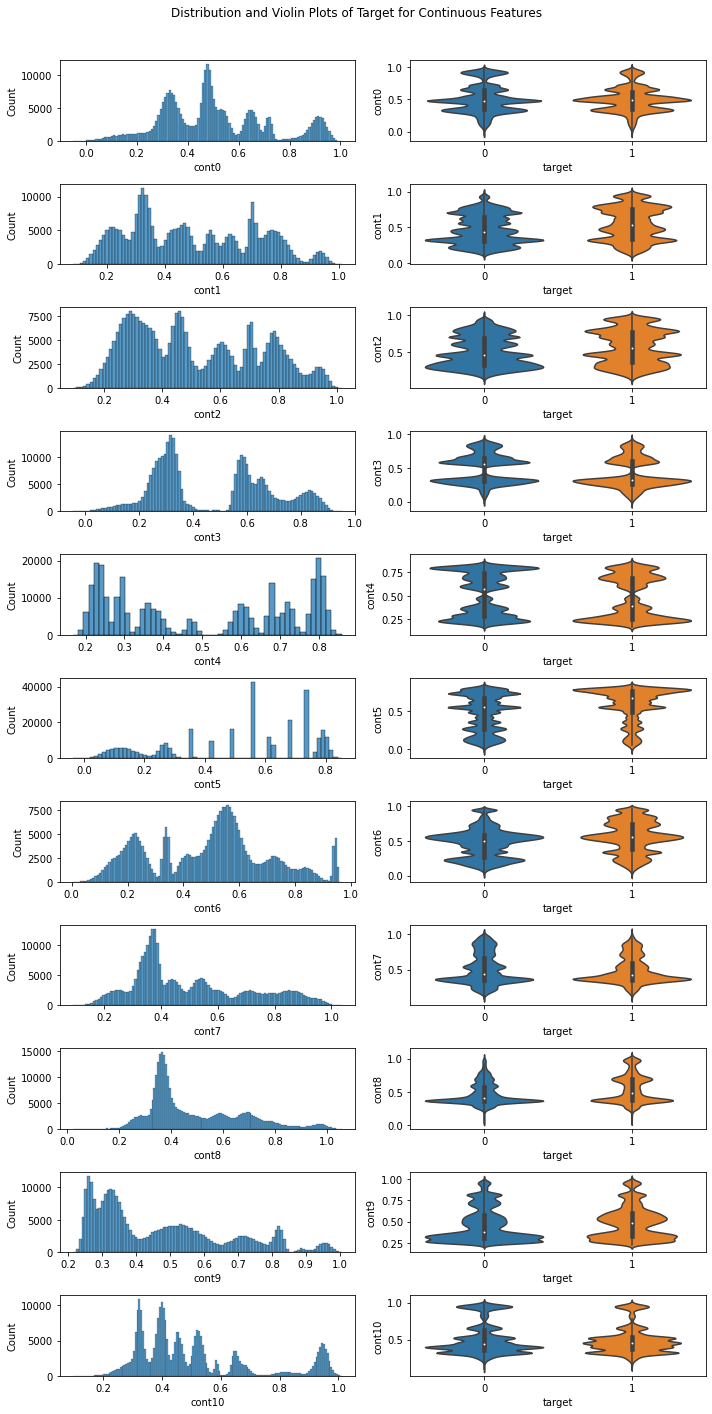

In [ ]:
# plotting continuous variables with target

plt.subplots(11,2, figsize=(10, 20 ))
plt.suptitle('Distribution and Violin Plots of Target for Continuous Features')
i = 1

for col in cont_features:
  plt.subplot(11,2,i)
  sns.histplot(df_train[col])
  i += 1

  plt.subplot(11,2,i)
  sns.violinplot(x=target, y=col, data=df_train)
  i += 1

  
plt.tight_layout(rect=[0, 0, 1, .95])
plt.show()

### Pearson's Correlation Coefficient
- Correlation heat map for continuous variables
- VIF analysis

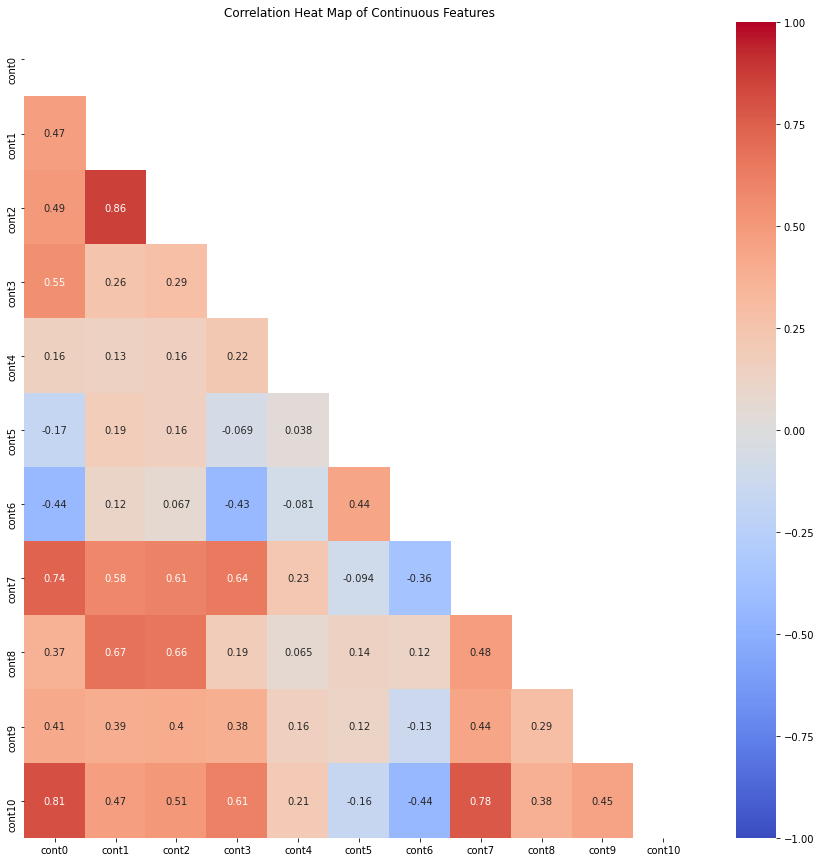

In [ ]:
cont_corr = df_train[cont_features].corr()
mask = np.triu(cont_corr)
plt.figure(figsize=(15,15))
plt.title('Correlation Heat Map of Continuous Features')
sns.heatmap(cont_corr, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

## Categorical Feature Analysis

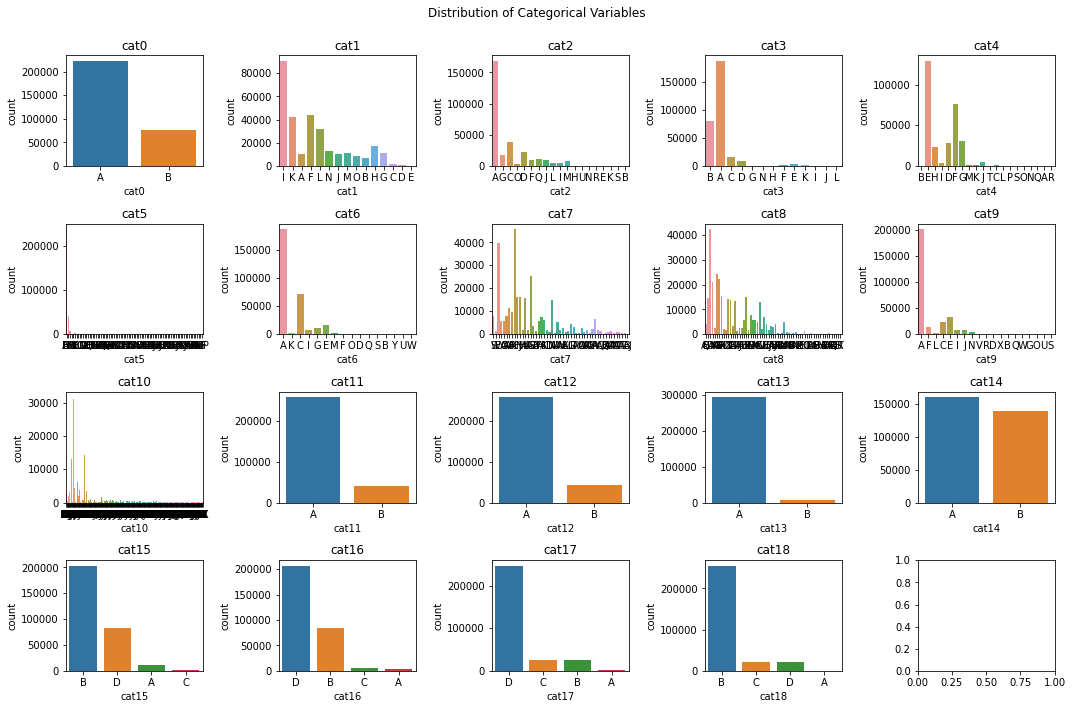

In [ ]:
plt.subplots(4,5, figsize=(15,10))
plt.suptitle('Distribution of Categorical Variables')

for i, col in enumerate(df_train[cat_features].columns, 1):
  plt.subplot(4,5,i)
  sns.countplot(x=df_train[col])
  plt.title(col)
plt.tight_layout(rect=[0, 0, 1, .95])
plt.show()

### Cross Tab (AKA Contingency Table)

In [ ]:
crosstab_dict = {}
for cat in cat_features:
  crosstab_dict[cat] = pd.crosstab(df_train[cat], target, margins=False)
  display(crosstab_dict[cat])

target,0,1
cat0,,
A,148852,74673
B,71687,4788


target,0,1
cat1,,
A,10081,466
B,4148,2699
C,1265,438
D,226,188
E,138,97
F,35110,8708
G,4797,6451
H,8573,8684
I,78807,12002


target,0,1
cat2,,
A,133307,35387
B,200,18
C,32743,6132
D,18020,4700
E,94,16
F,6016,3861
G,12564,5661
H,160,59
I,3029,2258


target,0,1
cat3,,
A,139026,48225
B,58620,21331
C,10841,5116
D,7074,1602
E,2438,880
F,1526,963
G,177,195
H,197,77
I,120,57


target,0,1
cat4,,
A,45,47
B,159,142
C,429,77
D,21762,6157
E,105953,23432
F,55373,21305
G,20310,10444
H,11742,11646
I,700,2541


target,0,1
cat5,,
A,84,2
AA,91,12
AB,28523,13116
AE,130,13
AF,108,4
...,...,...
U,101,12
V,118,13
X,78,20


target,0,1
cat6,,
A,147717,40179
B,153,19
C,48720,22707
D,169,45
E,11410,5171
F,225,87
G,5894,5304
I,3196,3452
K,1318,234


target,0,1
cat7,,
A,4211,2221
AA,3380,312
AB,461,78
AC,207,453
AD,1409,417
AE,319,139
AF,4343,7112
AG,1495,211
AH,29056,16762


target,0,1
cat8,,
A,1363,1925
AB,77,38
AC,57,0
AD,10962,3701
AE,19655,4787
...,...,...
T,66,1
U,115,42
V,210,9


target,0,1
cat9,,
A,138767,63178
B,172,108
C,18693,4667
D,184,5
E,29518,3528
F,12164,2207
G,193,21
I,5906,2025
J,7439,1543


target,0,1
cat10,,
AA,192,81
AB,104,155
AC,35,112
AD,475,14
AE,245,58
...,...,...
T,210,69
V,163,307
W,138,58


target,0,1
cat11,,
A,203340,55592
B,17199,23869


target,0,1
cat12,,
A,185179,71960
B,35360,7501


target,0,1
cat13,,
A,219374,73338
B,1165,6123


target,0,1
cat14,,
A,137706,22460
B,82833,57001


target,0,1
cat15,,
A,8954,2118
B,176567,27007
C,1579,587
D,33439,49749


target,0,1
cat16,,
A,2489,695
B,31016,53525
C,4003,1366
D,183031,23875


target,0,1
cat17,,
A,1154,260
B,14356,11780
C,9875,15450
D,195154,51971


target,0,1
cat18,,
A,555,155
B,207067,48415
C,6880,14534
D,6037,16357


In [ ]:
 display(crosstab_dict['cat0'])
 display(crosstab_dict['cat0'].iloc[0])
 print(crosstab_dict['cat0'].iloc[0].values)

target,0,1
cat0,,
A,148852,74673
B,71687,4788


target
0    148852
1     74673
Name: A, dtype: int64

[148852  74673]


### Chi-squared
- Describes the Significance of the relationship

In [ ]:
ting_list = []
for i in range(crosstab_dict['cat0'].shape[0]):
    ting = [crosstab_dict['cat0'].iloc[i].values]
    print(ting)
    ting_list.append(ting)
  

[array([148852,  74673])]
[array([71687,  4788])]


In [ ]:
obs = np.array([[148852,  74673], [71687,  4788]])
print(obs)
chi2, p, dof, _ = stats.chi2_contingency(obs)
print("chi2: ", chi2)
print("p-value: ", p)
print("dof: ", dof)

[[148852  74673]
 [ 71687   4788]]
chi2:  21563.301171608928
p-value:  0.0
dof:  1


In [ ]:
from scipy import stats
chi2_dict = {}
for cat in cat_features:
  print(cat)
  (chi2, p, dof, _) = stats.chi2_contingency([crosstab_dict[cat].iloc[i].values for i in range(crosstab_dict[cat].shape[0])])
  print("chi2: ", chi2)
  print("p-value: ", p)
  print("dof: ", dof)
  if p < 0.05:
    chi2_dict[cat] = chi2
  

cat0
chi2:  21563.301171608928
p-value:  0.0
dof:  1
cat1
chi2:  35206.79653816105
p-value:  0.0
dof:  14
cat2
chi2:  31707.547426612782
p-value:  0.0
dof:  18
cat3
chi2:  2492.213891030401
p-value:  0.0
dof:  12
cat4
chi2:  19132.751209828915
p-value:  0.0
dof:  19
cat5
chi2:  2289.2647041419623
p-value:  0.0
dof:  83
cat6
chi2:  11028.826053329332
p-value:  0.0
dof:  15
cat7
chi2:  26993.25842476949
p-value:  0.0
dof:  50
cat8
chi2:  32737.191907998058
p-value:  0.0
dof:  60
cat9
chi2:  8983.830551712
p-value:  0.0
dof:  18
cat10
chi2:  30794.775702264753
p-value:  0.0
dof:  298
cat11
chi2:  24451.646619905747
p-value:  0.0
dof:  1
cat12
chi2:  2073.299847084548
p-value:  0.0
dof:  1
cat13
chi2:  12692.418959846083
p-value:  0.0
dof:  1
cat14
chi2:  27414.379010671128
p-value:  0.0
dof:  1
cat15
chi2:  66003.05959292372
p-value:  0.0
dof:  3
cat16
chi2:  82661.6127356106
p-value:  0.0
dof:  3
cat17
chi2:  23961.536526989195
p-value:  0.0
dof:  3
cat18
chi2:  51222.688439829435
p-valu

### Cramer's V
- V = sqrt(chi2/(n*(min(C, R) -1))
 - n = total observations
 - min(C, R) is the minimum of colum, rows
- Describes the strength of the relationship
- Between 0 to 1
- phi coefficient used for tables of size 2x2 and larger
- Bias correction formula exists since Cramer's V can be heavily biased and overesitmate the strength of the relationship.

In [ ]:
cm = pd.crosstab(df_train['cat0'], target)
chi2 = stats.chi2_contingency(cm[1])
chi2

(0.0, 1.0, 0, array([74673.,  4788.]))

In [ ]:
# Cramer's V


def cramers_V(phi2, n, r, k):
  phi2corr = max(0, phi2 - ((k-1*(r-1))/(n-1)))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)

  return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))





# def cramers_V(X, y):
#   confusion_matrix = pd.crosstab(X, y)
#   chi2 = ss.chi2_contingency(confusion_matrix)[0]
#   n = confusion_matrix.sum().sum()
#   phi2 = chi2/n
#   r, k = confusion_matrix.shape
#   phi2corr = max(0, phi2 - ((k-1*(r-1))/(n-1)))
#   rcorr = r-((r-1)**2)/(n-1)
#   kcorr = k-((k-1)**2)/(n-1)
#   return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [ ]:
for cat in chi2_dict:
  n = crosstab_dict[cat].sum().sum()
  phi2 = chi2_dict[cat]/n
  r, k = crosstab_dict[cat].shape
  print(cat)
  print(cramers_V(phi2, n, r, k))

cat0
0.2680943431150807
cat1
0.34263155125650846
cat2
0.32518534830569845
cat3
0.09132765672990359
cat4
0.2526513744235031
cat5
0.08888706083337407
cat6
0.19184944533839704
cat7
0.30022962724609953
cat8
0.33063222982324747
cat9
0.17320373941961012
cat10
0.32192587306991405
cat11
0.2854862992583657
cat12
0.08311250911592473
cat13
0.20568147916559906
cat14
0.30228833027358165
cat15
0.46905678267226103
cat16
0.5249218617496746
cat17
0.28262234168572503
cat18
0.4132144688896604


# Train Test Split / Cross Validation
Making sure to prepare train and validation sets prior to processing to prevent data leakage

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state = 9, test_size=.25, stratify=target)


from sklearn.model_selection import StratifiedKFold
def stratified_k_fold(X, y, n_splits, random_state):
  skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
  for train_index, validation_index in skf.split(X, y):
    X_train, X_validation = X[train_index], y[validation_index]
    y_train, y_validation = y[train_index], y[validation_index]
    print(f"\nindex: [train_index]")
    print(f"\nX: {X_train}, {X_validation}")
    print(f"\ny: {y_train}, {y_validation}")
  return skf


# Time series analysis
from sklearn.model_selection import TimeSeriesSplit

### Train Test Split and Cross Validation
encoding prior to traintestsplits will cause some data leakage into the test data.  

- target leakage
  - any features that describe elements that change after the target is defined should be dropped.  In other words, any data procured after the moment of prediction should be excluded.
- train-test contamination
  - When using train test splits, validation datasets should not be fitted.  Otherwise when using cross-validation, preprocessing should occur inside pipelines


  
CV vs train test split

- CV should be used for small datasets



# Encoding Categorical Variables


**Categorical Variables**<br>
- drop
- label encoding / multi label encoding
  - assigns each value as a unique integer
  - label encoding can work well with ordinal variables when using decision trees or random forests

To determine encoding techniques, list the variability of each feature<br>

binary: cat0, cat11, cat12, cat13, cat14


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(X_train, X_validation, column):
  # handle_unknown = 'ignore' to avoid errors when validation data contains classes that aren't represented in the trianing data
  # sparse = False ensure the encoded columns are returned as numpy array instea of sparse matrix.  
  #          Sparse can help if individually used to model without the combination of other numerical features
  # drop = None keeps all features but could lead to perfect collinearity.
  #               Use with penalized linear classification or regression models.
  #               Maybe even datasets with minimal features?
  #      = first could solve the problem of perfect collinearity among classes that can be advantageous for neural networks or unregularized regression.  
  #               Introduces bias against the class that was dropped.  This is not good for penalized linear classification or regression models.
  #               It's probably best to remove a column manually that occurs the least and has the least effect on the target.

  OHE = OneHotEncoder(sparse=True, handle_unknown='ignore')
  fitted_OHE = OHE.fit(X_train)
  ohe_cols_train = fitted_OHE.transform(X_train)
  ohe_cols_validation = fitted_OHE.transform(X_validation)

  # Capture categories_
  categories = OHE.categories_

  # Remove categorical columns from the source set
  dropped_X_train = X_train.drop(column, axis=1)
  dropped_X_validation = X_validation.drop(column, axis=1)

  # Add ohe columns to sets missing source column
  ohe_X_train = pd.concat([dropped_X_train, ohe_cols_train], axis=1)
  ohe_X_validation = pd.concat([dropped_X_validation, ohe_cols_validation], axis=1)

  return ohe_X_train, ohe_X_validation


In [ ]:
col_arr = X_train['cat0'].to_numpy()
col_arr
col_arr_1D= col_arr.reshape(-1,1)
col_arr_1D

array([['A'],
       ['A'],
       ['A'],
       ...,
       ['B'],
       ['A'],
       ['B']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OHE0 = OneHotEncoder(handle_unknown='ignore')

fitted_OHE0 = OHE0.fit(col_arr_1D)
ohe_cat0_train_sp = OHE0.transform(col_arr_1D)
OHE0.categories_

ohe_cat0_train = pd.DataFrame.sparse.from_spmatrix(ohe_cat0_train_sp, columns=OHE0.categories_)
ohe_cat0_train


,A,B
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
224995,1.0,0.0
224996,1.0,0.0
224997,0.0,1.0
224998,1.0,0.0


In [ ]:
OHE_CAT = OneHotEncoder(handle_unknown='ignore')
fitted_OHE_CAT = OHE_CAT.fit(X_train[cat_features])
OHE_CAT_SP = OHE_CAT.transform(X_train[cat_features])
ohe_cat_columns_name = [cat_features[cat]+"_"+OHE_CAT.categories_[cat][i] for cat in range(len(cat_features)) for i in range(len(OHE_CAT.categories_[cat]))]
OHE_CAT_df = pd.DataFrame.sparse.from_spmatrix(OHE_CAT_SP, columns=ohe_cat_columns_name)
OHE_CAT_df

In [ ]:
from sklearn.preprocessing import LabelEncoder
# why should this be used for target y and not input x?

def label_encoder(X_train, X_validation, column):
  
  LE = Label_Encoder()
  fitted_LE = LE.fit(X_train)
  le_X_train = fitted_LE.transform(X_train)
  le_X_validation = fitted_LE.transform(X_validation)

  return X_train_fitted, X_validation_fitted

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Use ordinal encoder instead of label encoder if encoding the source data
# ...

In [ ]:
def encoded_df(original_df, categories):
  pass


In [ ]:
ohe_X_cat_train = X_train.copy()
ohe_X_cat_test = X_test.copy()

for col in cat_features:
  ohe_X_cat_train, ohe_X_cat_test = one_hot_encoder(ohe_X_cat_train, ohe_X_cat_test, col)





In [ ]:
df_train[cat_features+['target']]

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,target
0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0
1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0
2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0
3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0
4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,HG,A,A,A,B,D,B,D,B,0
299996,A,K,A,A,G,BI,A,K,AE,E,HK,A,B,A,B,B,D,D,B,0
299997,A,G,M,A,H,BI,C,L,F,A,HC,B,A,A,B,D,B,D,D,1
299998,B,H,A,D,B,BI,A,AA,AX,A,BF,A,A,A,A,B,A,D,A,0


# Encoding
- Cardinality: Controlling more/less distinct values

- binarizer
- label binarizer
- label encoder
- multi label binarizer
- onehoteencoder
- ordinal encoder
- kbinsdescretizer
- target encoding
- m estimate



Scaling
- maxabsscaler
- minmaxscaler
- robustscaler
- standardscaler



# Feature Selection / PCA?
Feature Selection<br>
First make sure there is no target leakage.  If a given feature can be used to definitively determine the values of another feature, the predicted feature should be removed.
- SelectKBest
- RFE
- Variance threshold
- chi2
- f_classif uses ANOVA F-value
- Mutual info classif / regression
- binning
- polynomial feature generation



Decomposition
- PCA
- NMF
- Kernel PCA


# Regression models
- Logistic
- sgd (classifier and regressor)
- ridge

- linear
- lasso
- bayesian
- outlier-robust regressor

- GLM




EVALUATION
- explained variance score
- MAE mean absolute error
- MSE mean squared error
- MSLE mean squared log error
- mean absolute percentage error
- r2 score

# Classification models

- confusion matrix
- auc
- roc with plots
- f1 score
- precision / recall 


# SVM

# Decision Tree

# Ensemble Models
- AdaBoost classifier/regressor
- isolation forest
- random forest classifier/regressor
- stacking classifier/regressor


# Naive Bayes

# Nearest Neighbors

# Clustering

- agglomerative
- birch
- dbscan
- kmeans
- mini batch kmeans
- spectral
- meanshift
